In [58]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import math

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2-y^2}}{(3^{-x^2-y^2}+1)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2-y^2}}{(3^{-x^2-y^2}+1)^2}$$

In [48]:
def f(x, y):
    r = 3 ** (-x ** 2 - y ** 2)
    return 1/(r + 1)

In [49]:
def fpx(x, y):
    r = 3 ** (-x ** 2 - y ** 2)
    return 2*x*math.log(3)*r/(r+1)**2

def fpy(x, y):
    r = 3 ** (-x ** 2 - y ** 2)
    return 2*y*math.log(3)*r/(r+1)**2

In [50]:
fpx(1.8, 1.0)

0.036808971619750504

## Gradient Descent with Python instead of sympy

In [51]:
multiplier = 0.1
max_iterations = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iterations):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
print('Values in gradient array ',gradients)
print('Minimum occurs at x at value of ', params[0])
print('Minimum occurs at y at value of ', params[1])
print('The cost is ', f(params[0], params[1]))

Values in gradient array  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x at value of  3.458385998858304e-11
Minimum occurs at y at value of  1.9213255549212797e-11
The cost is  0.5


## Graphing 3D Gradient Descent and nD numpy arrays

In [52]:
multiplier = 0.1
max_iterations = 5000
params = np.array([1.8, 1.0]) #initial guess
values_array = params
print(values_array.shape)  # 1D array with 2 elements 
values_array = params.reshape(1,2)  # convert the 1D array to a 2D array with 1 row and 2 columns
print(values_array.shape)

for n in range(max_iterations):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
    
print('Values in gradient array ',gradients)
print('Minimum occurs at x at value of ', params[0])
print('Minimum occurs at y at value of ', params[1])
print('The cost is ', f(params[0], params[1]))

(2,)
(1, 2)
Values in gradient array  [7.75981535e-122 4.31100853e-122]
Minimum occurs at x at value of  1.3350595106941272e-121
Minimum occurs at y at value of  7.41699728163399e-122
The cost is  0.5


In [53]:
#Numpy Array Practice
kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['hagulu', 'pugalu'], ['dimdim', 'rimtim']])
print(hs_band.shape)
print(hs_band[0])
print(hs_band[0][1])

the_roots = np.append(arr=hs_band, values=kirk, axis=0) # axis=0, it means that the arrays will be appended along the rows, effectively stacking them vertically
print(the_roots)
print(the_roots.shape)
print('Printing Columns', the_roots[:, 0]) # : means take all the rows

(1, 2)
(2, 2)
['hagulu' 'pugalu']
pugalu
[['hagulu' 'pugalu']
 ['dimdim' 'rimtim']
 ['Captain' 'Guitar']]
(3, 2)
Printing Columns ['hagulu' 'dimdim' 'Captain']


In [54]:
x = np.linspace(start=-1, stop=2, num=200)
y = np.linspace(start=-1, stop=2, num=200)
x, y = np.meshgrid(x, y)

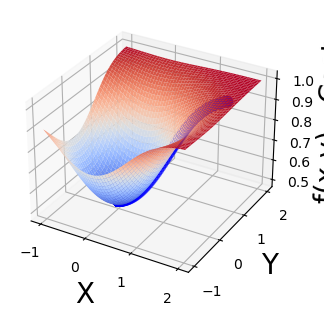

In [66]:
fig = plt.figure(figsize=[40,8])
axis = fig.add_subplot(222, projection='3d')
axis.set_xlabel('X', fontsize=20)
axis.set_ylabel('Y', fontsize=20)
axis.set_zlabel('f(x,y) - Cost', fontsize=20)
axis.plot_surface(x, y, f(x, y), cmap=cm.coolwarm)
axis.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='blue')
plt.show()